# Train Log 20181024 - voxel size: 0.5

## Results
```
2018-10-24 21:51:07.748179   Train one epoch  20 /  20


100%|██████████| 233/233 [03:43<00:00,  1.04it/s]

2018-10-24 21:54:51.446728  [Epoch 19] mean loss: 0.000043
2018-10-24 21:54:51.447019  [Epoch 19] accuracy: 0.997133
2018-10-24 21:54:51.447471  [Epoch 19] avg class acc: 0.991870
2018-10-24 21:54:51.448132  [Epoch 19] indivisual [0] class recall: 1.000000
2018-10-24 21:54:51.448312  [Epoch 19] indivisual [0] class precision: 0.991453
2018-10-24 21:54:51.448546  [Epoch 19] indivisual [1] class recall: 1.000000
2018-10-24 21:54:51.448995  [Epoch 19] indivisual [1] class precision: 1.000000
2018-10-24 21:54:51.449322  [Epoch 19] indivisual [2] class recall: 0.975610
2018-10-24 21:54:51.449613  [Epoch 19] indivisual [2] class precision: 1.000000
2018-10-24 21:54:51.450051   Evaluation one (validation set) epoch  20 /  20


100%|██████████| 58/58 [00:12<00:00,  4.52it/s]

2018-10-24 21:55:04.400397  [Epoch 19] vali mean loss: 0.000174
2018-10-24 21:55:04.401189  [Epoch 19] vali accuracy: 0.987310
2018-10-24 21:55:04.401885  [Epoch 19] vali avg class acc: 0.666667
2018-10-24 21:55:04.402194  [Epoch 19] vali indivisual [0] class recall: 1.000000
2018-10-24 21:55:04.402543  [Epoch 19] vali indivisual [0] class precision: 0.978102
2018-10-24 21:55:04.402690  [Epoch 19] vali indivisual [1] class recall: 1.000000
2018-10-24 21:55:04.403314  [Epoch 19] vali indivisual [1] class precision: 1.000000
2018-10-24 21:55:04.403464  [Epoch 19] vali indivisual [2] class recall: 0.914286
2018-10-24 21:55:04.403674  [Epoch 19] vali indivisual [2] class precision: 1.000000
2018-10-24 21:55:04.404001   Evaluation one (test set) epoch  20 /  20


100%|██████████| 58/58 [00:12<00:00,  4.48it/s]

2018-10-24 21:55:17.453169  [Epoch 19] test mean loss: 0.000174
2018-10-24 21:55:17.453847  [Epoch 19] test accuracy: 0.990759
2018-10-24 21:55:17.454103  [Epoch 19] test avg class acc: 1.000000
2018-10-24 21:55:17.454330  [Epoch 19] test indivisual [0] class recall: 1.000000
2018-10-24 21:55:17.454746  [Epoch 19] test indivisual [0] class precision: 1.000000
2018-10-24 21:55:17.455179  [Epoch 19] test indivisual [1] class recall: 1.000000
2018-10-24 21:55:17.455567  [Epoch 19] test indivisual [1] class precision: 1.000000
2018-10-24 21:55:17.455674  [Epoch 19] test indivisual [2] class recall: 1.000000
2018-10-24 21:55:17.455949  [Epoch 19] test indivisual [2] class precision: 1.000000
```

## Trained model
* [Download link]()

## Evaluation
* Incorrect sample
![results]()

In [1]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import time , datetime

sys.path.append( os.path.abspath('../../../Dataset/scripts'))
from utils import *

sys.path.append( os.path.abspath('../../model') )
from train import *
import model as MODEL

In [2]:
""" Path """

data_train_path = os.path.abspath('../../../Dataset/dataset/db_aug_v2_v_500_20181022_ndb_aug_v2_20181020/train.h5')
data_test_path = os.path.abspath('../../../Dataset/dataset/db_aug_v2_v_500_20181022_ndb_aug_v2_20181020/test.h5')
data_vali_path = os.path.abspath('../../../Dataset/dataset/db_aug_v2_v_500_20181022_ndb_aug_v2_20181020/vali.h5')

log_path = os.path.abspath('./train_log_20181024_v5.txt')

model_save_path = os.path.abspath('./model')
if not os.path.isdir(model_save_path) : os.mkdir(model_save_path)

""" Parameters """
GPU_INDEX = 0
NUM_POINT = 256
NUM_CLASSES = 3

BN_INIT_DECAY = 0.5
BN_DECAY_DECAY_RATE = 0.5
BN_DECAY_DECAY_STEP = float(200000)
BN_DECAY_CLIP = 0.99
DECAY_STEP = BN_DECAY_DECAY_STEP
DECAY_RATE = BN_DECAY_DECAY_RATE

BATCH_SIZE = 250

MOMENTUM = 0.9

BASE_LEARNING_RATE = 0.001

OPTIMIZER = 'adam'

MAX_EPOCH = 20

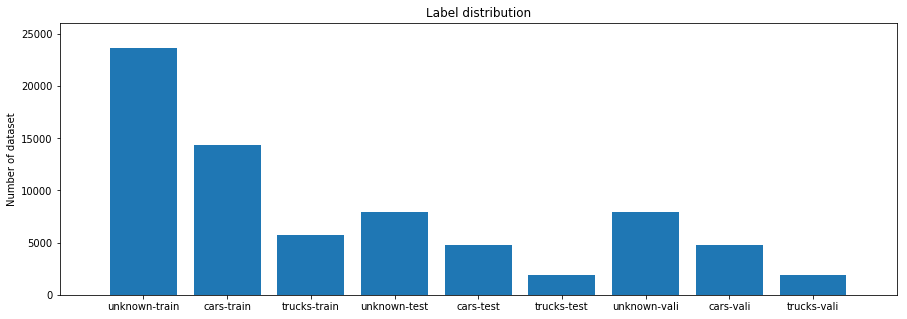

In [3]:
""" Load dataset"""

data = []
label = []

data_train, label_train = load_h5(data_train_path)
data_vali, label_vali = load_h5(data_vali_path)
data_test, label_test = load_h5(data_test_path)

data.append(data_train)
data.append(data_vali)
data.append(data_test)

label.append(label_train)
label.append(label_vali)
label.append(label_test)

""" Data statistics"""

label_list = [0,1,2]

y_val = []
for i in range( len ( data) ):
    for j in range ( len ( label_list ) ):
        y_val.append(np.sum(label[i] == label_list[j]))

x_name=('unknown-train', 'cars-train', 'trucks-train', 
        'unknown-test', 'cars-test', 'trucks-test', 
        'unknown-vali', 'cars-vali', 'trucks-vali')

index = range( len(x_name) )

plt.figure(figsize=(15,5))
plt.bar(index, y_val, tick_label=x_name, align='center')
plt.ylabel('Number of dataset')
plt.title('Label distribution')
plt.xlim( -1, len(x_name))
plt.ylim( 0, np.max(y_val) * 1.1 )
plt.show()

In [4]:
""" log file """
LOG_FOUT = open(log_path, 'w')

def log_string(out_str):
    out_str = str( datetime.datetime.fromtimestamp( time.time() ) ) + "  " + out_str
    LOG_FOUT.write(out_str+'\n')
    LOG_FOUT.flush()
    print(out_str)
    
    
def get_learning_rate(batch):
    learning_rate = tf.train.exponential_decay(
                        BASE_LEARNING_RATE,  # Base learning rate.
                        batch * BATCH_SIZE,  # Current index into the dataset.
                        DECAY_STEP,          # Decay step.
                        DECAY_RATE,          # Decay rate.
                        staircase=True)
    learning_rate = tf.maximum(learning_rate, 0.00001) # CLIP THE LEARNING RATE!
    return learning_rate        

def get_bn_decay(batch):
    bn_momentum = tf.train.exponential_decay(
                      BN_INIT_DECAY,
                      batch * BATCH_SIZE,
                      BN_DECAY_DECAY_STEP,
                      BN_DECAY_DECAY_RATE,
                      staircase=True)
    bn_decay = tf.minimum(BN_DECAY_CLIP, 1 - bn_momentum)
    return bn_decay

""" load traing model """
with tf.Graph().as_default():
    with tf.device('/gpu:'+str(GPU_INDEX)):
        pointclouds_pl, labels_pl = MODEL.placeholder_inputs(BATCH_SIZE, NUM_POINT)
        is_training_pl = tf.placeholder(tf.bool, shape=())
        print(is_training_pl)

        # Note the global_step=batch parameter to minimize. 
        # That tells the optimizer to helpfully increment the 'batch' parameter for you every time it trains.
        batch = tf.Variable(0)
        bn_decay = get_bn_decay(batch)
        tf.summary.scalar('bn_decay', bn_decay)

        # Get model and loss 
        pred, end_points = MODEL.get_model(pointclouds_pl, is_training_pl, bn_decay=bn_decay)
        loss = MODEL.get_loss(pred, labels_pl, end_points)
        tf.summary.scalar('loss', loss)

        correct = tf.equal(tf.argmax(pred, 1), tf.to_int64(labels_pl))
        accuracy = tf.reduce_sum(tf.cast(correct, tf.float32)) / float(BATCH_SIZE)
        tf.summary.scalar('accuracy', accuracy)

        # Get training operator
        learning_rate = get_learning_rate(batch)
        tf.summary.scalar('learning_rate', learning_rate)
        if OPTIMIZER == 'momentum':
            optimizer = tf.train.MomentumOptimizer(learning_rate, momentum=MOMENTUM)
        elif OPTIMIZER == 'adam':
            optimizer = tf.train.AdamOptimizer(learning_rate)
        train_op = optimizer.minimize(loss, global_step=batch)

        # Add ops to save and restore all the variables.
        saver = tf.train.Saver()

    # Create a session
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    config.allow_soft_placement = True
    config.log_device_placement = False
    sess = tf.Session(config=config)

    # Add summary writers
    #merged = tf.merge_all_summaries()
    merged = tf.summary.merge_all()

    train_writer_path = os.path.abspath('./train')
    if os.path.isdir(train_writer_path): os.system('rm -r {}'.format(train_writer_path))
    os.mkdir(train_writer_path)
        
    test_writer_path = os.path.abspath('./test')
    if os.path.isdir(test_writer_path): os.system('rm -r {}'.format(test_writer_path))
    os.mkdir(test_writer_path)
    
    
    train_writer = tf.summary.FileWriter(train_writer_path, sess.graph)
    test_writer = tf.summary.FileWriter(test_writer_path)
    
    
    # Init variables
    init = tf.global_variables_initializer()
    # To fix the bug introduced in TF 0.12.1 as in
    # http://stackoverflow.com/questions/41543774/invalidargumenterror-for-tensor-bool-tensorflow-0-12-1
    #sess.run(init)
    sess.run(init, {is_training_pl: True})

    ops = {'pointclouds_pl': pointclouds_pl,
           'labels_pl': labels_pl,
           'is_training_pl': is_training_pl,
           'pred': pred,
           'loss': loss,
           'train_op': train_op,
           'merged': merged,
           'step': batch}
    
    data_train = np.concatenate(data[:2])
    label_train = np.concatenate(label[:2])
    
    data_vali = data[1]
    label_vali = label[1]
    
    data_test = data[2]
    label_test = label[2]
    
        
    for epoch in range(MAX_EPOCH):
        
        ## Training
        log_string ( " Train one epoch %3d / %3d" % (epoch+1, MAX_EPOCH) )
        sys.stdout.flush()
        
        is_training = True
        
        # Shuffle train files
        train_file_idxs = np.arange(0, data_train.shape[0])
        np.random.shuffle(train_file_idxs)
        
        current_data = data_train[train_file_idxs] 
        current_label = label_train[train_file_idxs]
              
        ## Evaluation metric
        total_correct = 0
        total_seen = 0
        loss_sum = 0
        
        total_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_class = [0 for _ in range(NUM_CLASSES)]
        total_correct_class = [0 for _ in range(NUM_CLASSES)]
            
        num_batches = current_data.shape[0] // BATCH_SIZE
               
        for batch_idx in trange(num_batches):
            
            start_idx = batch_idx * BATCH_SIZE
            end_idx = (batch_idx+1) * BATCH_SIZE           

            # Augment batched point clouds by rotation and jittering
            rotated_data = provider.rotate_point_cloud(current_data[start_idx:end_idx, :, :])
            jittered_data = provider.jitter_point_cloud(rotated_data)
            
            feed_dict = {ops['pointclouds_pl']: jittered_data,
                         ops['labels_pl']: current_label[start_idx:end_idx],
                         ops['is_training_pl']: is_training,}
            
            summary, step, _, loss_val, pred_val = sess.run([ops['merged'], ops['step'],
                ops['train_op'], ops['loss'], ops['pred']], feed_dict=feed_dict)
            
            train_writer.add_summary(summary, step)
            
            pred_val = np.argmax(pred_val, 1)
            correct = np.sum(pred_val == current_label[start_idx:end_idx])
            total_correct += correct
            total_seen += BATCH_SIZE
            loss_sum += loss_val
            
            for i in range(NUM_CLASSES):
                total_class[i] = np.sum( np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx] )
                total_detect_class[i] = np.sum( np.ones(BATCH_SIZE) * i == pred_val )
                total_correct_class[i] = np.sum( (np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx]) * \
                                                    (np.ones(BATCH_SIZE) * i == pred_val) )
                                
        log_string(  '[Epoch %d] mean loss: %f' % \
                   (  epoch, loss_sum / float(total_seen)  )   )
        log_string(  '[Epoch %d] accuracy: %f'% \
                   (  epoch, total_correct / float(total_seen)  )   )
        log_string(  '[Epoch %d] avg class acc: %f' % \
                   (  epoch, np.mean( np.array(total_correct_class)/np.array(total_class,dtype=np.float) )  )   )
        
        for i_cls in range(NUM_CLASSES):
            log_string(  '[Epoch %d] indivisual [%d] class recall: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_class[i_cls])))    
            log_string(  '[Epoch %d] indivisual [%d] class precision: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_detect_class[i_cls])))    


        ## Evaluation using validation set    
        log_string ( " Evaluation one (validation set) epoch %3d / %3d" % (epoch+1, MAX_EPOCH) )
        sys.stdout.flush()
        
        is_training = False
        total_correct = 0
        total_seen = 0
        total_seen_class = [0 for _ in range(NUM_CLASSES)]
        total_correct_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_true_class = [0 for _ in range(NUM_CLASSES)]
        
        # Shuffle validation files
        file_idxs = np.arange(0, data_vali.shape[0])
        np.random.shuffle(file_idxs)
        
        current_data = data_vali[file_idxs]
        current_label = label_vali[file_idxs]
        
        num_batches = current_data.shape[0] // BATCH_SIZE
               
        for batch_idx in trange(num_batches):
            start_idx = batch_idx * BATCH_SIZE
            end_idx = (batch_idx+1) * BATCH_SIZE

            feed_dict = {ops['pointclouds_pl']: current_data[start_idx:end_idx, :, :],
                         ops['labels_pl']: current_label[start_idx:end_idx],
                         ops['is_training_pl']: is_training}
            summary, step, loss_val, pred_val = sess.run([ops['merged'], ops['step'],
                ops['loss'], ops['pred']], feed_dict=feed_dict)
            
            # test_writer.add_summary(summary, step)
            
            pred_val = np.argmax(pred_val, 1)
            correct = np.sum(pred_val == current_label[start_idx:end_idx])
            total_correct += correct
            total_seen += BATCH_SIZE
            
            for i in range(NUM_CLASSES):
                total_class[i] = np.sum( np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx] )
                total_detect_class[i] = np.sum( np.ones(BATCH_SIZE) * i == pred_val )
                total_correct_class[i] = np.sum( (np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx]) * \
                                                    (np.ones(BATCH_SIZE) * i == pred_val) )
                                
        log_string(  '[Epoch %d] vali mean loss: %f' % \
                   (  epoch, loss_sum / float(total_seen)  )   )
        log_string(  '[Epoch %d] vali accuracy: %f'% \
                   (  epoch, total_correct / float(total_seen)  )   )
        log_string(  '[Epoch %d] vali avg class acc: %f' % \
                   (  epoch, np.mean( np.array(total_correct_class) / np.array(total_class) )  )   )
        
        for i_cls in range(NUM_CLASSES):
            log_string(  '[Epoch %d] vali indivisual [%d] class recall: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_class[i_cls])))    
            log_string(  '[Epoch %d] vali indivisual [%d] class precision: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_detect_class[i_cls])))    
            
        ## Evaluation using test set    
        log_string ( " Evaluation one (test set) epoch %3d / %3d" % (epoch+1, MAX_EPOCH) )
        sys.stdout.flush()
        
        is_training = False
        total_correct = 0
        total_seen = 0
        total_seen_class = [0 for _ in range(NUM_CLASSES)]
        total_correct_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_class = [0 for _ in range(NUM_CLASSES)]
        total_detect_true_class = [0 for _ in range(NUM_CLASSES)]
        
        # Shuffle test files
        file_idxs = np.arange(0, data_test.shape[0])
        np.random.shuffle(file_idxs)
        
        current_data = data_test[file_idxs]
        current_label = label_test[file_idxs]
        
        
        num_batches = current_data.shape[0] // BATCH_SIZE
               
        for batch_idx in trange(num_batches):
            start_idx = batch_idx * BATCH_SIZE
            end_idx = (batch_idx+1) * BATCH_SIZE

            feed_dict = {ops['pointclouds_pl']: current_data[start_idx:end_idx, :, :],
                         ops['labels_pl']: current_label[start_idx:end_idx],
                         ops['is_training_pl']: is_training}
            summary, step, loss_val, pred_val = sess.run([ops['merged'], ops['step'],
                ops['loss'], ops['pred']], feed_dict=feed_dict)
            
            test_writer.add_summary(summary, step)
            
            pred_val = np.argmax(pred_val, 1)
            correct = np.sum(pred_val == current_label[start_idx:end_idx])
            total_correct += correct
            total_seen += BATCH_SIZE
            
            for i in range(NUM_CLASSES):
                total_class[i] = np.sum( np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx] )
                total_detect_class[i] = np.sum( np.ones(BATCH_SIZE) * i == pred_val )
                total_correct_class[i] = np.sum( (np.ones(BATCH_SIZE) * i == current_label[start_idx:end_idx]) * \
                                                    (np.ones(BATCH_SIZE) * i == pred_val) )
                                
        log_string(  '[Epoch %d] test mean loss: %f' % \
                   (  epoch, loss_sum / float(total_seen)  )   )
        log_string(  '[Epoch %d] test accuracy: %f'% \
                   (  epoch, total_correct / float(total_seen)  )   )
        log_string(  '[Epoch %d] test avg class acc: %f' % \
                   (  epoch, np.mean( np.array(total_correct_class)/np.array(total_class,dtype=np.float) )  )   )
        
        for i_cls in range(NUM_CLASSES):
            log_string(  '[Epoch %d] test indivisual [%d] class recall: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_class[i_cls])))    
            log_string(  '[Epoch %d] test indivisual [%d] class precision: %f' % \
                       (  epoch, i_cls, float(total_correct_class[i_cls])/float(total_detect_class[i_cls])))    
 
        # Save the variables to disk.
        if epoch % 10 == 0:
            save_path = saver.save(sess, os.path.join(model_save_path, "model.ckpt"))
            log_string("Model saved in file: %s" % save_path)
                

Tensor("Placeholder_2:0", shape=(), dtype=bool, device=/device:GPU:0)
INFO:tensorflow:Summary name classify loss is illegal; using classify_loss instead.
INFO:tensorflow:Summary name mat loss is illegal; using mat_loss instead.
2018-10-24 20:29:34.785817   Train one epoch   1 /  20


100%|██████████| 233/233 [03:31<00:00,  1.10it/s]

2018-10-24 20:33:06.239717  [Epoch 0] mean loss: 0.002584
2018-10-24 20:33:06.240513  [Epoch 0] accuracy: 0.883159
2018-10-24 20:33:06.241172  [Epoch 0] avg class acc: 0.908723
2018-10-24 20:33:06.241666  [Epoch 0] indivisual [0] class recall: 0.931298
2018-10-24 20:33:06.242068  [Epoch 0] indivisual [0] class precision: 0.953125
2018-10-24 20:33:06.242310  [Epoch 0] indivisual [1] class recall: 1.000000
2018-10-24 20:33:06.242487  [Epoch 0] indivisual [1] class precision: 0.952381
2018-10-24 20:33:06.242780  [Epoch 0] indivisual [2] class recall: 0.794872
2018-10-24 20:33:06.243022  [Epoch 0] indivisual [2] class precision: 0.815789
2018-10-24 20:33:06.243277   Evaluation one (validation set) epoch   1 /  20



100%|██████████| 58/58 [00:12<00:00,  4.67it/s]

2018-10-24 20:33:18.753188  [Epoch 0] vali mean loss: 0.010382
2018-10-24 20:33:18.754205  [Epoch 0] vali accuracy: 0.941172
2018-10-24 20:33:18.754646  [Epoch 0] vali avg class acc: 0.000000
2018-10-24 20:33:18.754793  [Epoch 0] vali indivisual [0] class recall: 0.964539
2018-10-24 20:33:18.754995  [Epoch 0] vali indivisual [0] class precision: 0.918919
2018-10-24 20:33:18.755793  [Epoch 0] vali indivisual [1] class recall: 0.971014
2018-10-24 20:33:18.756198  [Epoch 0] vali indivisual [1] class precision: 0.957143
2018-10-24 20:33:18.756349  [Epoch 0] vali indivisual [2] class recall: 0.750000
2018-10-24 20:33:18.756616  [Epoch 0] vali indivisual [2] class precision: 0.937500
2018-10-24 20:33:18.756754   Evaluation one (test set) epoch   1 /  20



100%|██████████| 58/58 [00:12<00:00,  4.73it/s]


2018-10-24 20:33:31.097273  [Epoch 0] test mean loss: 0.010382
2018-10-24 20:33:31.098174  [Epoch 0] test accuracy: 0.941379
2018-10-24 20:33:31.098422  [Epoch 0] test avg class acc: 0.886704
2018-10-24 20:33:31.098646  [Epoch 0] test indivisual [0] class recall: 0.984496
2018-10-24 20:33:31.098935  [Epoch 0] test indivisual [0] class precision: 0.913669
2018-10-24 20:33:31.099394  [Epoch 0] test indivisual [1] class recall: 0.950617
2018-10-24 20:33:31.099565  [Epoch 0] test indivisual [1] class precision: 0.939024
2018-10-24 20:33:31.099969  [Epoch 0] test indivisual [2] class recall: 0.725000
2018-10-24 20:33:31.100092  [Epoch 0] test indivisual [2] class precision: 1.000000
2018-10-24 20:33:32.126908  Model saved in file: /home/gozilla/kyungpyo/git/MasterThesisProject/Network/notebook/train_log_20181023_v5/model/model.ckpt
2018-10-24 20:33:32.127156   Train one epoch   2 /  20


100%|██████████| 233/233 [03:46<00:00,  1.03it/s]

2018-10-24 20:37:19.010883  [Epoch 1] mean loss: 0.000682
2018-10-24 20:37:19.011831  [Epoch 1] accuracy: 0.954369
2018-10-24 20:37:19.012466  [Epoch 1] avg class acc: 0.962344
2018-10-24 20:37:19.012671  [Epoch 1] indivisual [0] class recall: 0.977941
2018-10-24 20:37:19.012953  [Epoch 1] indivisual [0] class precision: 0.977941
2018-10-24 20:37:19.013128  [Epoch 1] indivisual [1] class recall: 1.000000
2018-10-24 20:37:19.013687  [Epoch 1] indivisual [1] class precision: 0.987805
2018-10-24 20:37:19.013973  [Epoch 1] indivisual [2] class recall: 0.909091
2018-10-24 20:37:19.014411  [Epoch 1] indivisual [2] class precision: 0.937500
2018-10-24 20:37:19.014524   Evaluation one (validation set) epoch   2 /  20



100%|██████████| 58/58 [00:13<00:00,  4.29it/s]

2018-10-24 20:37:32.671930  [Epoch 1] vali mean loss: 0.002739
2018-10-24 20:37:32.672834  [Epoch 1] vali accuracy: 0.939448
2018-10-24 20:37:32.673547  [Epoch 1] vali avg class acc: 0.333333
2018-10-24 20:37:32.673900  [Epoch 1] vali indivisual [0] class recall: 0.992806
2018-10-24 20:37:32.674357  [Epoch 1] vali indivisual [0] class precision: 0.932432
2018-10-24 20:37:32.674481  [Epoch 1] vali indivisual [1] class recall: 1.000000
2018-10-24 20:37:32.674763  [Epoch 1] vali indivisual [1] class precision: 0.988095
2018-10-24 20:37:32.675061  [Epoch 1] vali indivisual [2] class recall: 0.642857
2018-10-24 20:37:32.675257  [Epoch 1] vali indivisual [2] class precision: 1.000000
2018-10-24 20:37:32.675666   Evaluation one (test set) epoch   2 /  20



100%|██████████| 58/58 [00:13<00:00,  4.22it/s]

2018-10-24 20:37:46.523243  [Epoch 1] test mean loss: 0.002739
2018-10-24 20:37:46.524101  [Epoch 1] test accuracy: 0.943172
2018-10-24 20:37:46.524518  [Epoch 1] test avg class acc: 0.904189
2018-10-24 20:37:46.524670  [Epoch 1] test indivisual [0] class recall: 0.977273
2018-10-24 20:37:46.524937  [Epoch 1] test indivisual [0] class precision: 0.941606
2018-10-24 20:37:46.525118  [Epoch 1] test indivisual [1] class recall: 1.000000
2018-10-24 20:37:46.525257  [Epoch 1] test indivisual [1] class precision: 0.965517
2018-10-24 20:37:46.526174  [Epoch 1] test indivisual [2] class recall: 0.735294
2018-10-24 20:37:46.526465  [Epoch 1] test indivisual [2] class precision: 0.961538
2018-10-24 20:37:46.526687   Train one epoch   3 /  20



100%|██████████| 233/233 [03:49<00:00,  1.01it/s]

2018-10-24 20:41:36.357952  [Epoch 2] mean loss: 0.000464
2018-10-24 20:41:36.358447  [Epoch 2] accuracy: 0.966901
2018-10-24 20:41:36.359165  [Epoch 2] avg class acc: 0.970938
2018-10-24 20:41:36.359511  [Epoch 2] indivisual [0] class recall: 0.948529
2018-10-24 20:41:36.359667  [Epoch 2] indivisual [0] class precision: 1.000000
2018-10-24 20:41:36.360231  [Epoch 2] indivisual [1] class recall: 1.000000
2018-10-24 20:41:36.360443  [Epoch 2] indivisual [1] class precision: 0.966292
2018-10-24 20:41:36.360796  [Epoch 2] indivisual [2] class recall: 0.964286
2018-10-24 20:41:36.361033  [Epoch 2] indivisual [2] class precision: 0.843750
2018-10-24 20:41:36.361251   Evaluation one (validation set) epoch   3 /  20



100%|██████████| 58/58 [00:13<00:00,  4.25it/s]

2018-10-24 20:41:50.124513  [Epoch 2] vali mean loss: 0.001864
2018-10-24 20:41:50.125211  [Epoch 2] vali accuracy: 0.941517
2018-10-24 20:41:50.125754  [Epoch 2] vali avg class acc: 0.000000
2018-10-24 20:41:50.126038  [Epoch 2] vali indivisual [0] class recall: 0.977941
2018-10-24 20:41:50.126313  [Epoch 2] vali indivisual [0] class precision: 0.956835
2018-10-24 20:41:50.126772  [Epoch 2] vali indivisual [1] class recall: 0.951220
2018-10-24 20:41:50.127245  [Epoch 2] vali indivisual [1] class precision: 0.896552
2018-10-24 20:41:50.127535  [Epoch 2] vali indivisual [2] class recall: 0.718750
2018-10-24 20:41:50.127649  [Epoch 2] vali indivisual [2] class precision: 0.958333
2018-10-24 20:41:50.127755   Evaluation one (test set) epoch   3 /  20



100%|██████████| 58/58 [00:13<00:00,  4.40it/s]

2018-10-24 20:42:03.431446  [Epoch 2] test mean loss: 0.001864
2018-10-24 20:42:03.432476  [Epoch 2] test accuracy: 0.939724
2018-10-24 20:42:03.433392  [Epoch 2] test avg class acc: 0.907663
2018-10-24 20:42:03.433567  [Epoch 2] test indivisual [0] class recall: 0.980132
2018-10-24 20:42:03.434068  [Epoch 2] test indivisual [0] class precision: 0.973684
2018-10-24 20:42:03.434205  [Epoch 2] test indivisual [1] class recall: 1.000000
2018-10-24 20:42:03.434456  [Epoch 2] test indivisual [1] class precision: 0.901408
2018-10-24 20:42:03.434877  [Epoch 2] test indivisual [2] class recall: 0.742857
2018-10-24 20:42:03.435182  [Epoch 2] test indivisual [2] class precision: 0.962963
2018-10-24 20:42:03.435377   Train one epoch   4 /  20



100%|██████████| 233/233 [03:52<00:00,  1.00it/s]

2018-10-24 20:45:56.116489  [Epoch 3] mean loss: 0.000324
2018-10-24 20:45:56.116983  [Epoch 3] accuracy: 0.975828
2018-10-24 20:45:56.117601  [Epoch 3] avg class acc: 0.987745
2018-10-24 20:45:56.117957  [Epoch 3] indivisual [0] class recall: 0.963235
2018-10-24 20:45:56.118291  [Epoch 3] indivisual [0] class precision: 1.000000
2018-10-24 20:45:56.118609  [Epoch 3] indivisual [1] class recall: 1.000000
2018-10-24 20:45:56.119012  [Epoch 3] indivisual [1] class precision: 1.000000
2018-10-24 20:45:56.119255  [Epoch 3] indivisual [2] class recall: 1.000000
2018-10-24 20:45:56.119477  [Epoch 3] indivisual [2] class precision: 0.864865
2018-10-24 20:45:56.119701   Evaluation one (validation set) epoch   4 /  20



100%|██████████| 58/58 [00:13<00:00,  4.23it/s]

2018-10-24 20:46:09.927166  [Epoch 3] vali mean loss: 0.001302
2018-10-24 20:46:09.927651  [Epoch 3] vali accuracy: 0.979103
2018-10-24 20:46:09.927927  [Epoch 3] vali avg class acc: 0.333333
2018-10-24 20:46:09.928247  [Epoch 3] vali indivisual [0] class recall: 0.968992
2018-10-24 20:46:09.928596  [Epoch 3] vali indivisual [0] class precision: 0.984252
2018-10-24 20:46:09.929383  [Epoch 3] vali indivisual [1] class recall: 1.000000
2018-10-24 20:46:09.929577  [Epoch 3] vali indivisual [1] class precision: 0.989247
2018-10-24 20:46:09.929997  [Epoch 3] vali indivisual [2] class recall: 0.896552
2018-10-24 20:46:09.930131  [Epoch 3] vali indivisual [2] class precision: 0.866667
2018-10-24 20:46:09.930377   Evaluation one (test set) epoch   4 /  20



100%|██████████| 58/58 [00:13<00:00,  4.35it/s]

2018-10-24 20:46:23.380361  [Epoch 3] test mean loss: 0.001302
2018-10-24 20:46:23.381410  [Epoch 3] test accuracy: 0.980000
2018-10-24 20:46:23.381800  [Epoch 3] test avg class acc: 0.993692
2018-10-24 20:46:23.381989  [Epoch 3] test indivisual [0] class recall: 0.992188
2018-10-24 20:46:23.382169  [Epoch 3] test indivisual [0] class precision: 0.992188
2018-10-24 20:46:23.382657  [Epoch 3] test indivisual [1] class recall: 0.988889
2018-10-24 20:46:23.383013  [Epoch 3] test indivisual [1] class precision: 0.988889
2018-10-24 20:46:23.383185  [Epoch 3] test indivisual [2] class recall: 1.000000
2018-10-24 20:46:23.383750  [Epoch 3] test indivisual [2] class precision: 1.000000
2018-10-24 20:46:23.383888   Train one epoch   5 /  20



100%|██████████| 233/233 [03:56<00:00,  1.01s/it]

2018-10-24 20:50:19.708526  [Epoch 4] mean loss: 0.000234
2018-10-24 20:50:19.709706  [Epoch 4] accuracy: 0.981906
2018-10-24 20:50:19.710158  [Epoch 4] avg class acc: 0.985507
2018-10-24 20:50:19.710400  [Epoch 4] indivisual [0] class recall: 0.956522
2018-10-24 20:50:19.710731  [Epoch 4] indivisual [0] class precision: 1.000000
2018-10-24 20:50:19.710910  [Epoch 4] indivisual [1] class recall: 1.000000
2018-10-24 20:50:19.711549  [Epoch 4] indivisual [1] class precision: 1.000000
2018-10-24 20:50:19.711755  [Epoch 4] indivisual [2] class recall: 1.000000
2018-10-24 20:50:19.712059  [Epoch 4] indivisual [2] class precision: 0.857143
2018-10-24 20:50:19.712169   Evaluation one (validation set) epoch   5 /  20



100%|██████████| 58/58 [00:13<00:00,  4.33it/s]

2018-10-24 20:50:33.223241  [Epoch 4] vali mean loss: 0.000941
2018-10-24 20:50:33.224345  [Epoch 4] vali accuracy: 0.975586
2018-10-24 20:50:33.224785  [Epoch 4] vali avg class acc: 0.333333
2018-10-24 20:50:33.225137  [Epoch 4] vali indivisual [0] class recall: 0.969697
2018-10-24 20:50:33.225297  [Epoch 4] vali indivisual [0] class precision: 0.984615
2018-10-24 20:50:33.225494  [Epoch 4] vali indivisual [1] class recall: 1.000000
2018-10-24 20:50:33.225921  [Epoch 4] vali indivisual [1] class precision: 1.000000
2018-10-24 20:50:33.226126  [Epoch 4] vali indivisual [2] class recall: 0.941176
2018-10-24 20:50:33.226673  [Epoch 4] vali indivisual [2] class precision: 0.888889
2018-10-24 20:50:33.227066   Evaluation one (test set) epoch   5 /  20



100%|██████████| 58/58 [00:13<00:00,  4.26it/s]

2018-10-24 20:50:46.933245  [Epoch 4] test mean loss: 0.000941
2018-10-24 20:50:46.933830  [Epoch 4] test accuracy: 0.975241
2018-10-24 20:50:46.934247  [Epoch 4] test avg class acc: 0.995465
2018-10-24 20:50:46.934635  [Epoch 4] test indivisual [0] class recall: 0.986395
2018-10-24 20:50:46.934766  [Epoch 4] test indivisual [0] class precision: 1.000000
2018-10-24 20:50:46.934942  [Epoch 4] test indivisual [1] class recall: 1.000000
2018-10-24 20:50:46.935582  [Epoch 4] test indivisual [1] class precision: 1.000000
2018-10-24 20:50:46.935940  [Epoch 4] test indivisual [2] class recall: 1.000000
2018-10-24 20:50:46.936186  [Epoch 4] test indivisual [2] class precision: 0.941176
2018-10-24 20:50:46.936428   Train one epoch   6 /  20



100%|██████████| 233/233 [03:53<00:00,  1.00s/it]

2018-10-24 20:54:40.544227  [Epoch 5] mean loss: 0.000241
2018-10-24 20:54:40.545084  [Epoch 5] accuracy: 0.982455
2018-10-24 20:54:40.546362  [Epoch 5] avg class acc: 0.974709
2018-10-24 20:54:40.546550  [Epoch 5] indivisual [0] class recall: 0.984733
2018-10-24 20:54:40.546769  [Epoch 5] indivisual [0] class precision: 0.984733
2018-10-24 20:54:40.547134  [Epoch 5] indivisual [1] class recall: 1.000000
2018-10-24 20:54:40.547271  [Epoch 5] indivisual [1] class precision: 1.000000
2018-10-24 20:54:40.547777  [Epoch 5] indivisual [2] class recall: 0.939394
2018-10-24 20:54:40.548060  [Epoch 5] indivisual [2] class precision: 0.939394
2018-10-24 20:54:40.548520   Evaluation one (validation set) epoch   6 /  20



100%|██████████| 58/58 [00:13<00:00,  4.39it/s]

2018-10-24 20:54:53.861340  [Epoch 5] vali mean loss: 0.000967
2018-10-24 20:54:53.862294  [Epoch 5] vali accuracy: 0.966552
2018-10-24 20:54:53.862632  [Epoch 5] vali avg class acc: 0.000000
2018-10-24 20:54:53.862962  [Epoch 5] vali indivisual [0] class recall: 0.984848
2018-10-24 20:54:53.863237  [Epoch 5] vali indivisual [0] class precision: 0.962963
2018-10-24 20:54:53.863574  [Epoch 5] vali indivisual [1] class recall: 0.989130
2018-10-24 20:54:53.863866  [Epoch 5] vali indivisual [1] class precision: 0.978495
2018-10-24 20:54:53.864084  [Epoch 5] vali indivisual [2] class recall: 0.807692
2018-10-24 20:54:53.864380  [Epoch 5] vali indivisual [2] class precision: 0.954545
2018-10-24 20:54:53.864705   Evaluation one (test set) epoch   6 /  20



100%|██████████| 58/58 [00:13<00:00,  4.28it/s]

2018-10-24 20:55:07.513329  [Epoch 5] test mean loss: 0.000967
2018-10-24 20:55:07.514544  [Epoch 5] test accuracy: 0.969034
2018-10-24 20:55:07.515216  [Epoch 5] test avg class acc: 0.941176
2018-10-24 20:55:07.515497  [Epoch 5] test indivisual [0] class recall: 1.000000
2018-10-24 20:55:07.515688  [Epoch 5] test indivisual [0] class precision: 0.962121
2018-10-24 20:55:07.515925  [Epoch 5] test indivisual [1] class recall: 1.000000
2018-10-24 20:55:07.516064  [Epoch 5] test indivisual [1] class precision: 0.988889
2018-10-24 20:55:07.516661  [Epoch 5] test indivisual [2] class recall: 0.823529
2018-10-24 20:55:07.516839  [Epoch 5] test indivisual [2] class precision: 1.000000
2018-10-24 20:55:07.517231   Train one epoch   7 /  20



100%|██████████| 233/233 [03:49<00:00,  1.02it/s]

2018-10-24 20:58:56.837160  [Epoch 6] mean loss: 0.000206
2018-10-24 20:58:56.837933  [Epoch 6] accuracy: 0.985648
2018-10-24 20:58:56.839076  [Epoch 6] avg class acc: 0.991407
2018-10-24 20:58:56.839474  [Epoch 6] indivisual [0] class recall: 0.985714
2018-10-24 20:58:56.839663  [Epoch 6] indivisual [0] class precision: 1.000000
2018-10-24 20:58:56.840131  [Epoch 6] indivisual [1] class recall: 0.988506
2018-10-24 20:58:56.840321  [Epoch 6] indivisual [1] class precision: 1.000000
2018-10-24 20:58:56.840591  [Epoch 6] indivisual [2] class recall: 1.000000
2018-10-24 20:58:56.840996  [Epoch 6] indivisual [2] class precision: 0.884615
2018-10-24 20:58:56.841287   Evaluation one (validation set) epoch   7 /  20



100%|██████████| 58/58 [00:13<00:00,  4.34it/s]

2018-10-24 20:59:10.351840  [Epoch 6] vali mean loss: 0.000826
2018-10-24 20:59:10.352620  [Epoch 6] vali accuracy: 0.957655
2018-10-24 20:59:10.353176  [Epoch 6] vali avg class acc: 0.333333
2018-10-24 20:59:10.353467  [Epoch 6] vali indivisual [0] class recall: 1.000000
2018-10-24 20:59:10.353630  [Epoch 6] vali indivisual [0] class precision: 0.911950
2018-10-24 20:59:10.354218  [Epoch 6] vali indivisual [1] class recall: 0.898551
2018-10-24 20:59:10.354516  [Epoch 6] vali indivisual [1] class precision: 1.000000
2018-10-24 20:59:10.354733  [Epoch 6] vali indivisual [2] class recall: 0.805556
2018-10-24 20:59:10.354891  [Epoch 6] vali indivisual [2] class precision: 1.000000
2018-10-24 20:59:10.355085   Evaluation one (test set) epoch   7 /  20



100%|██████████| 58/58 [00:13<00:00,  4.28it/s]

2018-10-24 20:59:24.007975  [Epoch 6] test mean loss: 0.000826
2018-10-24 20:59:24.008411  [Epoch 6] test accuracy: 0.958345
2018-10-24 20:59:24.009058  [Epoch 6] test avg class acc: 0.908635
2018-10-24 20:59:24.009378  [Epoch 6] test indivisual [0] class recall: 1.000000
2018-10-24 20:59:24.009580  [Epoch 6] test indivisual [0] class precision: 0.920290
2018-10-24 20:59:24.009810  [Epoch 6] test indivisual [1] class recall: 0.975904
2018-10-24 20:59:24.010040  [Epoch 6] test indivisual [1] class precision: 0.987805
2018-10-24 20:59:24.010384  [Epoch 6] test indivisual [2] class recall: 0.750000
2018-10-24 20:59:24.010488  [Epoch 6] test indivisual [2] class precision: 1.000000
2018-10-24 20:59:24.010726   Train one epoch   8 /  20



100%|██████████| 233/233 [03:53<00:00,  1.00s/it]

2018-10-24 21:03:17.869462  [Epoch 7] mean loss: 0.000151
2018-10-24 21:03:17.869772  [Epoch 7] accuracy: 0.988464
2018-10-24 21:03:17.870651  [Epoch 7] avg class acc: 0.984691
2018-10-24 21:03:17.870803  [Epoch 7] indivisual [0] class recall: 0.984375
2018-10-24 21:03:17.870971  [Epoch 7] indivisual [0] class precision: 0.992126
2018-10-24 21:03:17.871404  [Epoch 7] indivisual [1] class recall: 1.000000
2018-10-24 21:03:17.871838  [Epoch 7] indivisual [1] class precision: 1.000000
2018-10-24 21:03:17.872309  [Epoch 7] indivisual [2] class recall: 0.969697
2018-10-24 21:03:17.872464  [Epoch 7] indivisual [2] class precision: 0.941176
2018-10-24 21:03:17.872684   Evaluation one (validation set) epoch   8 /  20



100%|██████████| 58/58 [00:13<00:00,  4.28it/s]

2018-10-24 21:03:31.531071  [Epoch 7] vali mean loss: 0.000606
2018-10-24 21:03:31.531307  [Epoch 7] vali accuracy: 0.982207
2018-10-24 21:03:31.531603  [Epoch 7] vali avg class acc: 0.666667
2018-10-24 21:03:31.532194  [Epoch 7] vali indivisual [0] class recall: 1.000000
2018-10-24 21:03:31.532458  [Epoch 7] vali indivisual [0] class precision: 0.977273
2018-10-24 21:03:31.532946  [Epoch 7] vali indivisual [1] class recall: 1.000000
2018-10-24 21:03:31.533052  [Epoch 7] vali indivisual [1] class precision: 1.000000
2018-10-24 21:03:31.533149  [Epoch 7] vali indivisual [2] class recall: 0.911765
2018-10-24 21:03:31.533311  [Epoch 7] vali indivisual [2] class precision: 1.000000
2018-10-24 21:03:31.533842   Evaluation one (test set) epoch   8 /  20



100%|██████████| 58/58 [00:13<00:00,  4.31it/s]

2018-10-24 21:03:45.085266  [Epoch 7] test mean loss: 0.000606
2018-10-24 21:03:45.085943  [Epoch 7] test accuracy: 0.983724
2018-10-24 21:03:45.086474  [Epoch 7] test avg class acc: 0.956454
2018-10-24 21:03:45.086612  [Epoch 7] test indivisual [0] class recall: 1.000000
2018-10-24 21:03:45.087063  [Epoch 7] test indivisual [0] class precision: 0.970370
2018-10-24 21:03:45.087350  [Epoch 7] test indivisual [1] class recall: 0.989362
2018-10-24 21:03:45.087520  [Epoch 7] test indivisual [1] class precision: 1.000000
2018-10-24 21:03:45.087615  [Epoch 7] test indivisual [2] class recall: 0.880000
2018-10-24 21:03:45.088314  [Epoch 7] test indivisual [2] class precision: 1.000000
2018-10-24 21:03:45.088419   Train one epoch   9 /  20



100%|██████████| 233/233 [03:58<00:00,  1.02s/it]

2018-10-24 21:07:43.516787  [Epoch 8] mean loss: 0.000137
2018-10-24 21:07:43.517144  [Epoch 8] accuracy: 0.989957
2018-10-24 21:07:43.517614  [Epoch 8] avg class acc: 0.997245
2018-10-24 21:07:43.518503  [Epoch 8] indivisual [0] class recall: 0.991736
2018-10-24 21:07:43.518687  [Epoch 8] indivisual [0] class precision: 1.000000
2018-10-24 21:07:43.518961  [Epoch 8] indivisual [1] class recall: 1.000000
2018-10-24 21:07:43.519094  [Epoch 8] indivisual [1] class precision: 1.000000
2018-10-24 21:07:43.519288  [Epoch 8] indivisual [2] class recall: 1.000000
2018-10-24 21:07:43.519547  [Epoch 8] indivisual [2] class precision: 0.970588
2018-10-24 21:07:43.519989   Evaluation one (validation set) epoch   9 /  20



100%|██████████| 58/58 [00:13<00:00,  4.35it/s]

2018-10-24 21:07:56.979258  [Epoch 8] vali mean loss: 0.000550
2018-10-24 21:07:56.980037  [Epoch 8] vali accuracy: 0.983379
2018-10-24 21:07:56.982096  [Epoch 8] vali avg class acc: 0.333333
2018-10-24 21:07:56.982502  [Epoch 8] vali indivisual [0] class recall: 1.000000
2018-10-24 21:07:56.982892  [Epoch 8] vali indivisual [0] class precision: 0.992248
2018-10-24 21:07:56.983292  [Epoch 8] vali indivisual [1] class recall: 0.988764
2018-10-24 21:07:56.983592  [Epoch 8] vali indivisual [1] class precision: 0.988764
2018-10-24 21:07:56.983763  [Epoch 8] vali indivisual [2] class recall: 0.969697
2018-10-24 21:07:56.984003  [Epoch 8] vali indivisual [2] class precision: 1.000000
2018-10-24 21:07:56.984259   Evaluation one (test set) epoch   9 /  20



100%|██████████| 58/58 [00:13<00:00,  4.25it/s]

2018-10-24 21:08:10.733146  [Epoch 8] test mean loss: 0.000550
2018-10-24 21:08:10.733721  [Epoch 8] test accuracy: 0.984414
2018-10-24 21:08:10.734270  [Epoch 8] test avg class acc: 0.967480
2018-10-24 21:08:10.734614  [Epoch 8] test indivisual [0] class recall: 1.000000
2018-10-24 21:08:10.734986  [Epoch 8] test indivisual [0] class precision: 0.979021
2018-10-24 21:08:10.735303  [Epoch 8] test indivisual [1] class recall: 1.000000
2018-10-24 21:08:10.735438  [Epoch 8] test indivisual [1] class precision: 0.985714
2018-10-24 21:08:10.735580  [Epoch 8] test indivisual [2] class recall: 0.902439
2018-10-24 21:08:10.735722  [Epoch 8] test indivisual [2] class precision: 1.000000
2018-10-24 21:08:10.735905   Train one epoch  10 /  20



100%|██████████| 233/233 [03:51<00:00,  1.01it/s]

2018-10-24 21:12:02.791973  [Epoch 9] mean loss: 0.000126
2018-10-24 21:12:02.793025  [Epoch 9] accuracy: 0.990506
2018-10-24 21:12:02.793602  [Epoch 9] avg class acc: 1.000000
2018-10-24 21:12:02.793872  [Epoch 9] indivisual [0] class recall: 1.000000
2018-10-24 21:12:02.794103  [Epoch 9] indivisual [0] class precision: 1.000000
2018-10-24 21:12:02.794313  [Epoch 9] indivisual [1] class recall: 1.000000
2018-10-24 21:12:02.794448  [Epoch 9] indivisual [1] class precision: 1.000000
2018-10-24 21:12:02.795003  [Epoch 9] indivisual [2] class recall: 1.000000
2018-10-24 21:12:02.795469  [Epoch 9] indivisual [2] class precision: 1.000000
2018-10-24 21:12:02.795768   Evaluation one (validation set) epoch  10 /  20



100%|██████████| 58/58 [00:13<00:00,  4.33it/s]

2018-10-24 21:12:16.301519  [Epoch 9] vali mean loss: 0.000507
2018-10-24 21:12:16.302215  [Epoch 9] vali accuracy: 0.944966
2018-10-24 21:12:16.302593  [Epoch 9] vali avg class acc: 0.333333
2018-10-24 21:12:16.303181  [Epoch 9] vali indivisual [0] class recall: 1.000000
2018-10-24 21:12:16.303401  [Epoch 9] vali indivisual [0] class precision: 0.914474
2018-10-24 21:12:16.303559  [Epoch 9] vali indivisual [1] class recall: 0.985714
2018-10-24 21:12:16.303763  [Epoch 9] vali indivisual [1] class precision: 1.000000
2018-10-24 21:12:16.303880  [Epoch 9] vali indivisual [2] class recall: 0.707317
2018-10-24 21:12:16.304445  [Epoch 9] vali indivisual [2] class precision: 1.000000
2018-10-24 21:12:16.304623   Evaluation one (test set) epoch  10 /  20



100%|██████████| 58/58 [00:13<00:00,  4.23it/s]

2018-10-24 21:12:30.086962  [Epoch 9] test mean loss: 0.000507
2018-10-24 21:12:30.087776  [Epoch 9] test accuracy: 0.949448
2018-10-24 21:12:30.088163  [Epoch 9] test avg class acc: 0.891968
2018-10-24 21:12:30.088724  [Epoch 9] test indivisual [0] class recall: 1.000000
2018-10-24 21:12:30.088948  [Epoch 9] test indivisual [0] class precision: 0.925676
2018-10-24 21:12:30.089122  [Epoch 9] test indivisual [1] class recall: 0.975904
2018-10-24 21:12:30.089285  [Epoch 9] test indivisual [1] class precision: 1.000000
2018-10-24 21:12:30.089750  [Epoch 9] test indivisual [2] class recall: 0.700000
2018-10-24 21:12:30.090026  [Epoch 9] test indivisual [2] class precision: 1.000000
2018-10-24 21:12:30.090292   Train one epoch  11 /  20



100%|██████████| 233/233 [03:49<00:00,  1.02it/s]

2018-10-24 21:16:19.459535  [Epoch 10] mean loss: 0.000104
2018-10-24 21:16:19.459851  [Epoch 10] accuracy: 0.992446
2018-10-24 21:16:19.460650  [Epoch 10] avg class acc: 1.000000
2018-10-24 21:16:19.461180  [Epoch 10] indivisual [0] class recall: 1.000000
2018-10-24 21:16:19.461417  [Epoch 10] indivisual [0] class precision: 1.000000
2018-10-24 21:16:19.461708  [Epoch 10] indivisual [1] class recall: 1.000000
2018-10-24 21:16:19.461998  [Epoch 10] indivisual [1] class precision: 1.000000
2018-10-24 21:16:19.462281  [Epoch 10] indivisual [2] class recall: 1.000000
2018-10-24 21:16:19.462446  [Epoch 10] indivisual [2] class precision: 1.000000
2018-10-24 21:16:19.462605   Evaluation one (validation set) epoch  11 /  20



100%|██████████| 58/58 [00:13<00:00,  4.41it/s]

2018-10-24 21:16:32.724645  [Epoch 10] vali mean loss: 0.000417
2018-10-24 21:16:32.725260  [Epoch 10] vali accuracy: 0.977448
2018-10-24 21:16:32.725754  [Epoch 10] vali avg class acc: 0.333333
2018-10-24 21:16:32.726067  [Epoch 10] vali indivisual [0] class recall: 0.992754
2018-10-24 21:16:32.726213  [Epoch 10] vali indivisual [0] class precision: 0.971631
2018-10-24 21:16:32.726383  [Epoch 10] vali indivisual [1] class recall: 1.000000
2018-10-24 21:16:32.726529  [Epoch 10] vali indivisual [1] class precision: 1.000000
2018-10-24 21:16:32.726908  [Epoch 10] vali indivisual [2] class recall: 0.862069
2018-10-24 21:16:32.727313  [Epoch 10] vali indivisual [2] class precision: 0.961538
2018-10-24 21:16:32.727578   Evaluation one (test set) epoch  11 /  20



100%|██████████| 58/58 [00:12<00:00,  4.47it/s]


2018-10-24 21:16:45.816847  [Epoch 10] test mean loss: 0.000417
2018-10-24 21:16:45.817111  [Epoch 10] test accuracy: 0.980552
2018-10-24 21:16:45.817710  [Epoch 10] test avg class acc: 0.990196
2018-10-24 21:16:45.818023  [Epoch 10] test indivisual [0] class recall: 1.000000
2018-10-24 21:16:45.818466  [Epoch 10] test indivisual [0] class precision: 0.992481
2018-10-24 21:16:45.818572  [Epoch 10] test indivisual [1] class recall: 1.000000
2018-10-24 21:16:45.818849  [Epoch 10] test indivisual [1] class precision: 1.000000
2018-10-24 21:16:45.819135  [Epoch 10] test indivisual [2] class recall: 0.970588
2018-10-24 21:16:45.819515  [Epoch 10] test indivisual [2] class precision: 1.000000
2018-10-24 21:16:46.623692  Model saved in file: /home/gozilla/kyungpyo/git/MasterThesisProject/Network/notebook/train_log_20181023_v5/model/model.ckpt
2018-10-24 21:16:46.623899   Train one epoch  12 /  20


100%|██████████| 233/233 [03:52<00:00,  1.00it/s]

2018-10-24 21:20:39.574126  [Epoch 11] mean loss: 0.000085
2018-10-24 21:20:39.575119  [Epoch 11] accuracy: 0.993923
2018-10-24 21:20:39.575592  [Epoch 11] avg class acc: 1.000000
2018-10-24 21:20:39.575946  [Epoch 11] indivisual [0] class recall: 1.000000
2018-10-24 21:20:39.576145  [Epoch 11] indivisual [0] class precision: 1.000000
2018-10-24 21:20:39.576378  [Epoch 11] indivisual [1] class recall: 1.000000
2018-10-24 21:20:39.576629  [Epoch 11] indivisual [1] class precision: 1.000000
2018-10-24 21:20:39.577120  [Epoch 11] indivisual [2] class recall: 1.000000
2018-10-24 21:20:39.577293  [Epoch 11] indivisual [2] class precision: 1.000000
2018-10-24 21:20:39.577683   Evaluation one (validation set) epoch  12 /  20



100%|██████████| 58/58 [00:13<00:00,  4.29it/s]

2018-10-24 21:20:53.231689  [Epoch 11] vali mean loss: 0.000340
2018-10-24 21:20:53.232088  [Epoch 11] vali accuracy: 0.985448
2018-10-24 21:20:53.232680  [Epoch 11] vali avg class acc: 0.666667
2018-10-24 21:20:53.232981  [Epoch 11] vali indivisual [0] class recall: 1.000000
2018-10-24 21:20:53.233216  [Epoch 11] vali indivisual [0] class precision: 0.992424
2018-10-24 21:20:53.233644  [Epoch 11] vali indivisual [1] class recall: 1.000000
2018-10-24 21:20:53.233899  [Epoch 11] vali indivisual [1] class precision: 0.987952
2018-10-24 21:20:53.234051  [Epoch 11] vali indivisual [2] class recall: 0.945946
2018-10-24 21:20:53.234457  [Epoch 11] vali indivisual [2] class precision: 1.000000
2018-10-24 21:20:53.234793   Evaluation one (test set) epoch  12 /  20



100%|██████████| 58/58 [00:13<00:00,  4.33it/s]

2018-10-24 21:21:06.723905  [Epoch 11] test mean loss: 0.000340
2018-10-24 21:21:06.724155  [Epoch 11] test accuracy: 0.987586
2018-10-24 21:21:06.724812  [Epoch 11] test avg class acc: 0.986883
2018-10-24 21:21:06.725396  [Epoch 11] test indivisual [0] class recall: 0.992908
2018-10-24 21:21:06.725657  [Epoch 11] test indivisual [0] class precision: 0.992908
2018-10-24 21:21:06.725848  [Epoch 11] test indivisual [1] class recall: 1.000000
2018-10-24 21:21:06.726101  [Epoch 11] test indivisual [1] class precision: 1.000000
2018-10-24 21:21:06.726344  [Epoch 11] test indivisual [2] class recall: 0.967742
2018-10-24 21:21:06.726446  [Epoch 11] test indivisual [2] class precision: 0.967742
2018-10-24 21:21:06.726632   Train one epoch  13 /  20



100%|██████████| 233/233 [03:50<00:00,  1.01it/s]

2018-10-24 21:24:56.949535  [Epoch 12] mean loss: 0.000080
2018-10-24 21:24:56.950530  [Epoch 12] accuracy: 0.994077
2018-10-24 21:24:56.951147  [Epoch 12] avg class acc: 0.989083
2018-10-24 21:24:56.951500  [Epoch 12] indivisual [0] class recall: 0.992248
2018-10-24 21:24:56.951672  [Epoch 12] indivisual [0] class precision: 0.992248
2018-10-24 21:24:56.951931  [Epoch 12] indivisual [1] class recall: 1.000000
2018-10-24 21:24:56.952227  [Epoch 12] indivisual [1] class precision: 1.000000
2018-10-24 21:24:56.952660  [Epoch 12] indivisual [2] class recall: 0.975000
2018-10-24 21:24:56.952926  [Epoch 12] indivisual [2] class precision: 0.975000
2018-10-24 21:24:56.953030   Evaluation one (validation set) epoch  13 /  20



100%|██████████| 58/58 [00:13<00:00,  4.26it/s]

2018-10-24 21:25:10.655652  [Epoch 12] vali mean loss: 0.000323
2018-10-24 21:25:10.656591  [Epoch 12] vali accuracy: 0.986138
2018-10-24 21:25:10.657260  [Epoch 12] vali avg class acc: 0.666667
2018-10-24 21:25:10.657416  [Epoch 12] vali indivisual [0] class recall: 1.000000
2018-10-24 21:25:10.657616  [Epoch 12] vali indivisual [0] class precision: 0.986014
2018-10-24 21:25:10.657840  [Epoch 12] vali indivisual [1] class recall: 1.000000
2018-10-24 21:25:10.658004  [Epoch 12] vali indivisual [1] class precision: 0.987342
2018-10-24 21:25:10.658522  [Epoch 12] vali indivisual [2] class recall: 0.903226
2018-10-24 21:25:10.658838  [Epoch 12] vali indivisual [2] class precision: 1.000000
2018-10-24 21:25:10.658983   Evaluation one (test set) epoch  13 /  20



100%|██████████| 58/58 [00:14<00:00,  4.13it/s]

2018-10-24 21:25:24.810236  [Epoch 12] test mean loss: 0.000323
2018-10-24 21:25:24.810837  [Epoch 12] test accuracy: 0.988552
2018-10-24 21:25:24.811150  [Epoch 12] test avg class acc: 0.955556
2018-10-24 21:25:24.811355  [Epoch 12] test indivisual [0] class recall: 1.000000
2018-10-24 21:25:24.811820  [Epoch 12] test indivisual [0] class precision: 0.972973
2018-10-24 21:25:24.812249  [Epoch 12] test indivisual [1] class recall: 1.000000
2018-10-24 21:25:24.812507  [Epoch 12] test indivisual [1] class precision: 1.000000
2018-10-24 21:25:24.812900  [Epoch 12] test indivisual [2] class recall: 0.866667
2018-10-24 21:25:24.813000  [Epoch 12] test indivisual [2] class precision: 1.000000
2018-10-24 21:25:24.813295   Train one epoch  14 /  20



100%|██████████| 233/233 [03:51<00:00,  1.01it/s]

2018-10-24 21:29:16.856539  [Epoch 13] mean loss: 0.000076
2018-10-24 21:29:16.856945  [Epoch 13] accuracy: 0.994386
2018-10-24 21:29:16.857325  [Epoch 13] avg class acc: 0.993464
2018-10-24 21:29:16.857966  [Epoch 13] indivisual [0] class recall: 0.980392
2018-10-24 21:29:16.858224  [Epoch 13] indivisual [0] class precision: 1.000000
2018-10-24 21:29:16.858467  [Epoch 13] indivisual [1] class recall: 1.000000
2018-10-24 21:29:16.858740  [Epoch 13] indivisual [1] class precision: 1.000000
2018-10-24 21:29:16.859014  [Epoch 13] indivisual [2] class recall: 1.000000
2018-10-24 21:29:16.859448  [Epoch 13] indivisual [2] class precision: 0.896552
2018-10-24 21:29:16.859560   Evaluation one (validation set) epoch  14 /  20



100%|██████████| 58/58 [00:14<00:00,  4.01it/s]

2018-10-24 21:29:31.469525  [Epoch 13] vali mean loss: 0.000303
2018-10-24 21:29:31.469832  [Epoch 13] vali accuracy: 0.970138
2018-10-24 21:29:31.470228  [Epoch 13] vali avg class acc: 0.666667
2018-10-24 21:29:31.471012  [Epoch 13] vali indivisual [0] class recall: 1.000000
2018-10-24 21:29:31.471239  [Epoch 13] vali indivisual [0] class precision: 0.976000
2018-10-24 21:29:31.471452  [Epoch 13] vali indivisual [1] class recall: 1.000000
2018-10-24 21:29:31.471599  [Epoch 13] vali indivisual [1] class precision: 1.000000
2018-10-24 21:29:31.472157  [Epoch 13] vali indivisual [2] class recall: 0.900000
2018-10-24 21:29:31.472334  [Epoch 13] vali indivisual [2] class precision: 1.000000
2018-10-24 21:29:31.472734   Evaluation one (test set) epoch  14 /  20



100%|██████████| 58/58 [00:14<00:00,  3.97it/s]

2018-10-24 21:29:46.176592  [Epoch 13] test mean loss: 0.000303
2018-10-24 21:29:46.177356  [Epoch 13] test accuracy: 0.972000
2018-10-24 21:29:46.178104  [Epoch 13] test avg class acc: 0.942764
2018-10-24 21:29:46.178440  [Epoch 13] test indivisual [0] class recall: 1.000000
2018-10-24 21:29:46.178944  [Epoch 13] test indivisual [0] class precision: 0.953488
2018-10-24 21:29:46.179130  [Epoch 13] test indivisual [1] class recall: 0.989583
2018-10-24 21:29:46.179379  [Epoch 13] test indivisual [1] class precision: 1.000000
2018-10-24 21:29:46.179692  [Epoch 13] test indivisual [2] class recall: 0.838710
2018-10-24 21:29:46.179983  [Epoch 13] test indivisual [2] class precision: 1.000000
2018-10-24 21:29:46.180181   Train one epoch  15 /  20



100%|██████████| 233/233 [03:51<00:00,  1.01it/s]

2018-10-24 21:33:37.884488  [Epoch 14] mean loss: 0.000057
2018-10-24 21:33:37.885662  [Epoch 14] accuracy: 0.996223
2018-10-24 21:33:37.886172  [Epoch 14] avg class acc: 0.988506
2018-10-24 21:33:37.886742  [Epoch 14] indivisual [0] class recall: 1.000000
2018-10-24 21:33:37.886869  [Epoch 14] indivisual [0] class precision: 0.992366
2018-10-24 21:33:37.887323  [Epoch 14] indivisual [1] class recall: 1.000000
2018-10-24 21:33:37.887547  [Epoch 14] indivisual [1] class precision: 1.000000
2018-10-24 21:33:37.887835  [Epoch 14] indivisual [2] class recall: 0.965517
2018-10-24 21:33:37.887974  [Epoch 14] indivisual [2] class precision: 1.000000
2018-10-24 21:33:37.888164   Evaluation one (validation set) epoch  15 /  20



100%|██████████| 58/58 [00:13<00:00,  4.42it/s]

2018-10-24 21:33:51.155232  [Epoch 14] vali mean loss: 0.000229
2018-10-24 21:33:51.155662  [Epoch 14] vali accuracy: 0.975931
2018-10-24 21:33:51.156700  [Epoch 14] vali avg class acc: 0.666667
2018-10-24 21:33:51.157051  [Epoch 14] vali indivisual [0] class recall: 1.000000
2018-10-24 21:33:51.157417  [Epoch 14] vali indivisual [0] class precision: 0.944828
2018-10-24 21:33:51.157899  [Epoch 14] vali indivisual [1] class recall: 1.000000
2018-10-24 21:33:51.158010  [Epoch 14] vali indivisual [1] class precision: 0.986667
2018-10-24 21:33:51.158257  [Epoch 14] vali indivisual [2] class recall: 0.769231
2018-10-24 21:33:51.158704  [Epoch 14] vali indivisual [2] class precision: 1.000000
2018-10-24 21:33:51.159124   Evaluation one (test set) epoch  15 /  20



100%|██████████| 58/58 [00:13<00:00,  4.29it/s]

2018-10-24 21:34:04.758842  [Epoch 14] test mean loss: 0.000229
2018-10-24 21:34:04.759575  [Epoch 14] test accuracy: 0.977931
2018-10-24 21:34:04.760127  [Epoch 14] test avg class acc: 0.975309
2018-10-24 21:34:04.760423  [Epoch 14] test indivisual [0] class recall: 1.000000
2018-10-24 21:34:04.760865  [Epoch 14] test indivisual [0] class precision: 0.985075
2018-10-24 21:34:04.761155  [Epoch 14] test indivisual [1] class recall: 1.000000
2018-10-24 21:34:04.761372  [Epoch 14] test indivisual [1] class precision: 1.000000
2018-10-24 21:34:04.761534  [Epoch 14] test indivisual [2] class recall: 0.925926
2018-10-24 21:34:04.761979  [Epoch 14] test indivisual [2] class precision: 1.000000
2018-10-24 21:34:04.762191   Train one epoch  16 /  20



100%|██████████| 233/233 [03:50<00:00,  1.01it/s]

2018-10-24 21:37:55.415465  [Epoch 15] mean loss: 0.000057
2018-10-24 21:37:55.416541  [Epoch 15] accuracy: 0.996189
2018-10-24 21:37:55.417389  [Epoch 15] avg class acc: 0.990476
2018-10-24 21:37:55.417662  [Epoch 15] indivisual [0] class recall: 1.000000
2018-10-24 21:37:55.418053  [Epoch 15] indivisual [0] class precision: 0.992308
2018-10-24 21:37:55.418354  [Epoch 15] indivisual [1] class recall: 1.000000
2018-10-24 21:37:55.418796  [Epoch 15] indivisual [1] class precision: 1.000000
2018-10-24 21:37:55.419067  [Epoch 15] indivisual [2] class recall: 0.971429
2018-10-24 21:37:55.419203  [Epoch 15] indivisual [2] class precision: 1.000000
2018-10-24 21:37:55.419311   Evaluation one (validation set) epoch  16 /  20



100%|██████████| 58/58 [00:13<00:00,  4.24it/s]

2018-10-24 21:38:09.224996  [Epoch 15] vali mean loss: 0.000228
2018-10-24 21:38:09.225643  [Epoch 15] vali accuracy: 0.958414
2018-10-24 21:38:09.226349  [Epoch 15] vali avg class acc: 0.666667
2018-10-24 21:38:09.226704  [Epoch 15] vali indivisual [0] class recall: 1.000000
2018-10-24 21:38:09.227002  [Epoch 15] vali indivisual [0] class precision: 0.930556
2018-10-24 21:38:09.227214  [Epoch 15] vali indivisual [1] class recall: 1.000000
2018-10-24 21:38:09.227377  [Epoch 15] vali indivisual [1] class precision: 0.989130
2018-10-24 21:38:09.227650  [Epoch 15] vali indivisual [2] class recall: 0.560000
2018-10-24 21:38:09.228164  [Epoch 15] vali indivisual [2] class precision: 1.000000
2018-10-24 21:38:09.228448   Evaluation one (test set) epoch  16 /  20



100%|██████████| 58/58 [00:13<00:00,  4.25it/s]

2018-10-24 21:38:22.979907  [Epoch 15] test mean loss: 0.000228
2018-10-24 21:38:22.980508  [Epoch 15] test accuracy: 0.962552
2018-10-24 21:38:22.981112  [Epoch 15] test avg class acc: 0.936508
2018-10-24 21:38:22.981513  [Epoch 15] test indivisual [0] class recall: 1.000000
2018-10-24 21:38:22.981809  [Epoch 15] test indivisual [0] class precision: 0.938931
2018-10-24 21:38:22.982084  [Epoch 15] test indivisual [1] class recall: 1.000000
2018-10-24 21:38:22.982253  [Epoch 15] test indivisual [1] class precision: 1.000000
2018-10-24 21:38:22.982560  [Epoch 15] test indivisual [2] class recall: 0.809524
2018-10-24 21:38:22.982864  [Epoch 15] test indivisual [2] class precision: 1.000000
2018-10-24 21:38:22.983347   Train one epoch  17 /  20



100%|██████████| 233/233 [03:53<00:00,  1.00s/it]

2018-10-24 21:42:17.138914  [Epoch 16] mean loss: 0.000056
2018-10-24 21:42:17.139294  [Epoch 16] accuracy: 0.996309
2018-10-24 21:42:17.139873  [Epoch 16] avg class acc: 0.987419
2018-10-24 21:42:17.140642  [Epoch 16] indivisual [0] class recall: 0.993506
2018-10-24 21:42:17.140769  [Epoch 16] indivisual [0] class precision: 0.993506
2018-10-24 21:42:17.141058  [Epoch 16] indivisual [1] class recall: 1.000000
2018-10-24 21:42:17.141482  [Epoch 16] indivisual [1] class precision: 1.000000
2018-10-24 21:42:17.141593  [Epoch 16] indivisual [2] class recall: 0.968750
2018-10-24 21:42:17.141828  [Epoch 16] indivisual [2] class precision: 0.968750
2018-10-24 21:42:17.142137   Evaluation one (validation set) epoch  17 /  20



100%|██████████| 58/58 [00:13<00:00,  4.41it/s]

2018-10-24 21:42:30.394712  [Epoch 16] vali mean loss: 0.000224
2018-10-24 21:42:30.395346  [Epoch 16] vali accuracy: 0.990138
2018-10-24 21:42:30.395996  [Epoch 16] vali avg class acc: 0.666667
2018-10-24 21:42:30.396323  [Epoch 16] vali indivisual [0] class recall: 1.000000
2018-10-24 21:42:30.396639  [Epoch 16] vali indivisual [0] class precision: 0.993631
2018-10-24 21:42:30.396921  [Epoch 16] vali indivisual [1] class recall: 1.000000
2018-10-24 21:42:30.397363  [Epoch 16] vali indivisual [1] class precision: 1.000000
2018-10-24 21:42:30.397471  [Epoch 16] vali indivisual [2] class recall: 0.967742
2018-10-24 21:42:30.397568  [Epoch 16] vali indivisual [2] class precision: 1.000000
2018-10-24 21:42:30.398125   Evaluation one (test set) epoch  17 /  20



100%|██████████| 58/58 [00:13<00:00,  4.45it/s]

2018-10-24 21:42:43.546206  [Epoch 16] test mean loss: 0.000224
2018-10-24 21:42:43.546741  [Epoch 16] test accuracy: 0.991448
2018-10-24 21:42:43.547247  [Epoch 16] test avg class acc: 1.000000
2018-10-24 21:42:43.547948  [Epoch 16] test indivisual [0] class recall: 1.000000
2018-10-24 21:42:43.548367  [Epoch 16] test indivisual [0] class precision: 1.000000
2018-10-24 21:42:43.548475  [Epoch 16] test indivisual [1] class recall: 1.000000
2018-10-24 21:42:43.548747  [Epoch 16] test indivisual [1] class precision: 1.000000
2018-10-24 21:42:43.549009  [Epoch 16] test indivisual [2] class recall: 1.000000
2018-10-24 21:42:43.549360  [Epoch 16] test indivisual [2] class precision: 1.000000
2018-10-24 21:42:43.549641   Train one epoch  18 /  20



100%|██████████| 233/233 [03:46<00:00,  1.03it/s]

2018-10-24 21:46:30.015917  [Epoch 17] mean loss: 0.000050
2018-10-24 21:46:30.016668  [Epoch 17] accuracy: 0.996687
2018-10-24 21:46:30.017231  [Epoch 17] avg class acc: 0.997531
2018-10-24 21:46:30.017617  [Epoch 17] indivisual [0] class recall: 0.992593
2018-10-24 21:46:30.017796  [Epoch 17] indivisual [0] class precision: 1.000000
2018-10-24 21:46:30.018420  [Epoch 17] indivisual [1] class recall: 1.000000
2018-10-24 21:46:30.018822  [Epoch 17] indivisual [1] class precision: 1.000000
2018-10-24 21:46:30.019120  [Epoch 17] indivisual [2] class recall: 1.000000
2018-10-24 21:46:30.019285  [Epoch 17] indivisual [2] class precision: 0.964286
2018-10-24 21:46:30.019548   Evaluation one (validation set) epoch  18 /  20



100%|██████████| 58/58 [00:13<00:00,  4.41it/s]

2018-10-24 21:46:43.273626  [Epoch 17] vali mean loss: 0.000200
2018-10-24 21:46:43.274618  [Epoch 17] vali accuracy: 0.977931
2018-10-24 21:46:43.274972  [Epoch 17] vali avg class acc: 0.666667
2018-10-24 21:46:43.275206  [Epoch 17] vali indivisual [0] class recall: 1.000000
2018-10-24 21:46:43.275498  [Epoch 17] vali indivisual [0] class precision: 0.960938
2018-10-24 21:46:43.275700  [Epoch 17] vali indivisual [1] class recall: 1.000000
2018-10-24 21:46:43.275913  [Epoch 17] vali indivisual [1] class precision: 1.000000
2018-10-24 21:46:43.276605  [Epoch 17] vali indivisual [2] class recall: 0.875000
2018-10-24 21:46:43.276706  [Epoch 17] vali indivisual [2] class precision: 1.000000
2018-10-24 21:46:43.277045   Evaluation one (test set) epoch  18 /  20



100%|██████████| 58/58 [00:13<00:00,  4.35it/s]

2018-10-24 21:46:56.720207  [Epoch 17] test mean loss: 0.000200
2018-10-24 21:46:56.720603  [Epoch 17] test accuracy: 0.980414
2018-10-24 21:46:56.720937  [Epoch 17] test avg class acc: 0.927460
2018-10-24 21:46:56.721272  [Epoch 17] test indivisual [0] class recall: 0.992908
2018-10-24 21:46:56.721689  [Epoch 17] test indivisual [0] class precision: 0.952381
2018-10-24 21:46:56.722018  [Epoch 17] test indivisual [1] class recall: 1.000000
2018-10-24 21:46:56.722300  [Epoch 17] test indivisual [1] class precision: 0.986111
2018-10-24 21:46:56.722672  [Epoch 17] test indivisual [2] class recall: 0.789474
2018-10-24 21:46:56.723059  [Epoch 17] test indivisual [2] class precision: 0.967742
2018-10-24 21:46:56.723348   Train one epoch  19 /  20



100%|██████████| 233/233 [03:44<00:00,  1.04it/s]

2018-10-24 21:50:41.384585  [Epoch 18] mean loss: 0.000044
2018-10-24 21:50:41.385209  [Epoch 18] accuracy: 0.997133
2018-10-24 21:50:41.387217  [Epoch 18] avg class acc: 1.000000
2018-10-24 21:50:41.387681  [Epoch 18] indivisual [0] class recall: 1.000000
2018-10-24 21:50:41.388033  [Epoch 18] indivisual [0] class precision: 1.000000
2018-10-24 21:50:41.388501  [Epoch 18] indivisual [1] class recall: 1.000000
2018-10-24 21:50:41.388652  [Epoch 18] indivisual [1] class precision: 1.000000
2018-10-24 21:50:41.388890  [Epoch 18] indivisual [2] class recall: 1.000000
2018-10-24 21:50:41.389165  [Epoch 18] indivisual [2] class precision: 1.000000
2018-10-24 21:50:41.389453   Evaluation one (validation set) epoch  19 /  20



100%|██████████| 58/58 [00:12<00:00,  4.47it/s]

2018-10-24 21:50:54.494687  [Epoch 18] vali mean loss: 0.000176
2018-10-24 21:50:54.495315  [Epoch 18] vali accuracy: 0.983034
2018-10-24 21:50:54.495592  [Epoch 18] vali avg class acc: 0.666667
2018-10-24 21:50:54.496132  [Epoch 18] vali indivisual [0] class recall: 1.000000
2018-10-24 21:50:54.496447  [Epoch 18] vali indivisual [0] class precision: 0.985185
2018-10-24 21:50:54.496557  [Epoch 18] vali indivisual [1] class recall: 1.000000
2018-10-24 21:50:54.496855  [Epoch 18] vali indivisual [1] class precision: 1.000000
2018-10-24 21:50:54.497152  [Epoch 18] vali indivisual [2] class recall: 0.947368
2018-10-24 21:50:54.497592  [Epoch 18] vali indivisual [2] class precision: 1.000000
2018-10-24 21:50:54.497700   Evaluation one (test set) epoch  19 /  20



100%|██████████| 58/58 [00:13<00:00,  4.41it/s]

2018-10-24 21:51:07.744818  [Epoch 18] test mean loss: 0.000176
2018-10-24 21:51:07.745394  [Epoch 18] test accuracy: 0.986345
2018-10-24 21:51:07.746115  [Epoch 18] test avg class acc: 0.960784
2018-10-24 21:51:07.746456  [Epoch 18] test indivisual [0] class recall: 1.000000
2018-10-24 21:51:07.746765  [Epoch 18] test indivisual [0] class precision: 0.977941
2018-10-24 21:51:07.747065  [Epoch 18] test indivisual [1] class recall: 1.000000
2018-10-24 21:51:07.747211  [Epoch 18] test indivisual [1] class precision: 0.988095
2018-10-24 21:51:07.747561  [Epoch 18] test indivisual [2] class recall: 0.882353
2018-10-24 21:51:07.747904  [Epoch 18] test indivisual [2] class precision: 1.000000
2018-10-24 21:51:07.748179   Train one epoch  20 /  20



100%|██████████| 233/233 [03:43<00:00,  1.04it/s]

2018-10-24 21:54:51.446728  [Epoch 19] mean loss: 0.000043
2018-10-24 21:54:51.447019  [Epoch 19] accuracy: 0.997133
2018-10-24 21:54:51.447471  [Epoch 19] avg class acc: 0.991870
2018-10-24 21:54:51.448132  [Epoch 19] indivisual [0] class recall: 1.000000
2018-10-24 21:54:51.448312  [Epoch 19] indivisual [0] class precision: 0.991453
2018-10-24 21:54:51.448546  [Epoch 19] indivisual [1] class recall: 1.000000
2018-10-24 21:54:51.448995  [Epoch 19] indivisual [1] class precision: 1.000000
2018-10-24 21:54:51.449322  [Epoch 19] indivisual [2] class recall: 0.975610
2018-10-24 21:54:51.449613  [Epoch 19] indivisual [2] class precision: 1.000000
2018-10-24 21:54:51.450051   Evaluation one (validation set) epoch  20 /  20



100%|██████████| 58/58 [00:12<00:00,  4.52it/s]

2018-10-24 21:55:04.400397  [Epoch 19] vali mean loss: 0.000174
2018-10-24 21:55:04.401189  [Epoch 19] vali accuracy: 0.987310
2018-10-24 21:55:04.401885  [Epoch 19] vali avg class acc: 0.666667
2018-10-24 21:55:04.402194  [Epoch 19] vali indivisual [0] class recall: 1.000000
2018-10-24 21:55:04.402543  [Epoch 19] vali indivisual [0] class precision: 0.978102
2018-10-24 21:55:04.402690  [Epoch 19] vali indivisual [1] class recall: 1.000000
2018-10-24 21:55:04.403314  [Epoch 19] vali indivisual [1] class precision: 1.000000
2018-10-24 21:55:04.403464  [Epoch 19] vali indivisual [2] class recall: 0.914286
2018-10-24 21:55:04.403674  [Epoch 19] vali indivisual [2] class precision: 1.000000
2018-10-24 21:55:04.404001   Evaluation one (test set) epoch  20 /  20



100%|██████████| 58/58 [00:12<00:00,  4.48it/s]

2018-10-24 21:55:17.453169  [Epoch 19] test mean loss: 0.000174
2018-10-24 21:55:17.453847  [Epoch 19] test accuracy: 0.990759
2018-10-24 21:55:17.454103  [Epoch 19] test avg class acc: 1.000000
2018-10-24 21:55:17.454330  [Epoch 19] test indivisual [0] class recall: 1.000000
2018-10-24 21:55:17.454746  [Epoch 19] test indivisual [0] class precision: 1.000000
2018-10-24 21:55:17.455179  [Epoch 19] test indivisual [1] class recall: 1.000000
2018-10-24 21:55:17.455567  [Epoch 19] test indivisual [1] class precision: 1.000000
2018-10-24 21:55:17.455674  [Epoch 19] test indivisual [2] class recall: 1.000000
2018-10-24 21:55:17.455949  [Epoch 19] test indivisual [2] class precision: 1.000000
